In [21]:
library(singscore)
library(tidyverse)
library(ggplot2)

In [ ]:
# Set random seed so this part is reproducible
# https://www.random.org/ 2023-08-09
set.seed(3866) 

In [22]:
test_minmax <- read.table("../../../data/expression/processed/test/V2/IO-Atlas-NSCLC-TPM-MinMaxNorm-TEST-2023-06-01-V8.tsv", 
                          sep='\t', 
                          row.names=1, 
                          header=T)

test_label <- read.table("../../../data/expression/processed/test/V2/IO-Atlas-NSCLC-LABEL-TEST-2023-06-01-V8.tsv", 
                         sep='\t', 
                         row.names=1, 
                         header=F)

In [23]:
gs <- read.table("../../../data/gs/IO-Atlas-NSCLC-TPM-MinMaxNorm-TRAIN-2023-06-01-V8-gene-sets.tsv",
                 sep='\t', 
                 header=T)

In [25]:
cluster0_up <- gs %>% filter((gs == "ratio-cluster0") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster0_dwn <- gs %>% filter((gs == "ratio-cluster0") & (direction == "down")) %>% pull("gene") %>% unique()

cluster1_up <- gs %>% filter((gs == "ratio-cluster1") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster1_dwn <- gs %>% filter((gs == "ratio-cluster1") & (direction == "down")) %>% pull("gene") %>% unique()

cluster2_up <- gs %>% filter((gs == "ratio-cluster2") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster2_dwn <- gs %>% filter((gs == "ratio-cluster2") & (direction == "down")) %>% pull("gene") %>% unique()

cluster3_up <- gs %>% filter((gs == "ratio-cluster3") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster3_dwn <- gs %>% filter((gs == "ratio-cluster3") & (direction == "down")) %>% pull("gene") %>% unique()

#cluster4_up <- gs %>% filter((gs == "ratio-cluster4") & (direction == "up")) %>%  pull("gene") %>% unique()
#cluster4_dwn <- gs %>% filter((gs == "ratio-cluster4") & (direction == "down")) %>% pull("gene") %>% unique()

In [26]:
rnk <- rankGenes(test_minmax)

In [27]:
cluster0score <- simpleScore(rnk, upSet = cluster0_dwn, downSet = cluster0_up)
cluster1score <- simpleScore(rnk, upSet = cluster1_up, downSet = cluster1_dwn)
cluster2score <- simpleScore(rnk, upSet = cluster2_up, downSet = cluster2_dwn)
cluster3score <- simpleScore(rnk, upSet = cluster3_up, downSet = cluster3_dwn)
#cluster4score <- simpleScore(rnk, upSet = cluster4_up, downSet = cluster4_dwn)

In [28]:
cluster0score["response"] <- test_label
cluster1score["response"] <- test_label
cluster2score["response"] <- test_label
cluster3score["response"] <- test_label
#cluster4score["response"] <- test_label

Warning message in `[<-.data.frame`(`*tmp*`, "response", value = structure(list(:
“replacement element 1 has 15 rows to replace 0 rows”


In [29]:
t.test(cluster0score %>% filter(response==1) %>% pull("TotalScore"), cluster0score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster0score %>% filter(response == 1) %>% pull("TotalScore") and cluster0score %>% filter(response == 0) %>% pull("TotalScore")
t = 0.97265, df = 9.3209, p-value = 0.3553
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05008761  0.12634662
sample estimates:
   mean of x    mean of y 
 0.033023491 -0.005106014 


In [30]:
t.test(cluster1score %>% filter(response==1) %>% pull("TotalScore"), cluster1score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster1score %>% filter(response == 1) %>% pull("TotalScore") and cluster1score %>% filter(response == 0) %>% pull("TotalScore")
t = 1.2309, df = 9.5082, p-value = 0.248
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1009672  0.3463287
sample estimates:
 mean of x  mean of y 
0.15709729 0.03441658 


In [31]:
t.test(cluster3score %>% filter(response==1) %>% pull("TotalScore"), cluster3score %>% filter(response==0) %>% pull("TotalScore"))

ERROR: Error in t.test.default(cluster3score %>% filter(response == 1) %>% pull("TotalScore"), : not enough 'x' observations


In [32]:
#t.test(cluster4score %>% filter(response==1) %>% pull("TotalScore"), cluster4score %>% filter(response==0) %>% pull("TotalScore"))

ERROR: Error in t.test.default(cluster4score %>% filter(response == 1) %>% pull("TotalScore"), : not enough 'x' observations


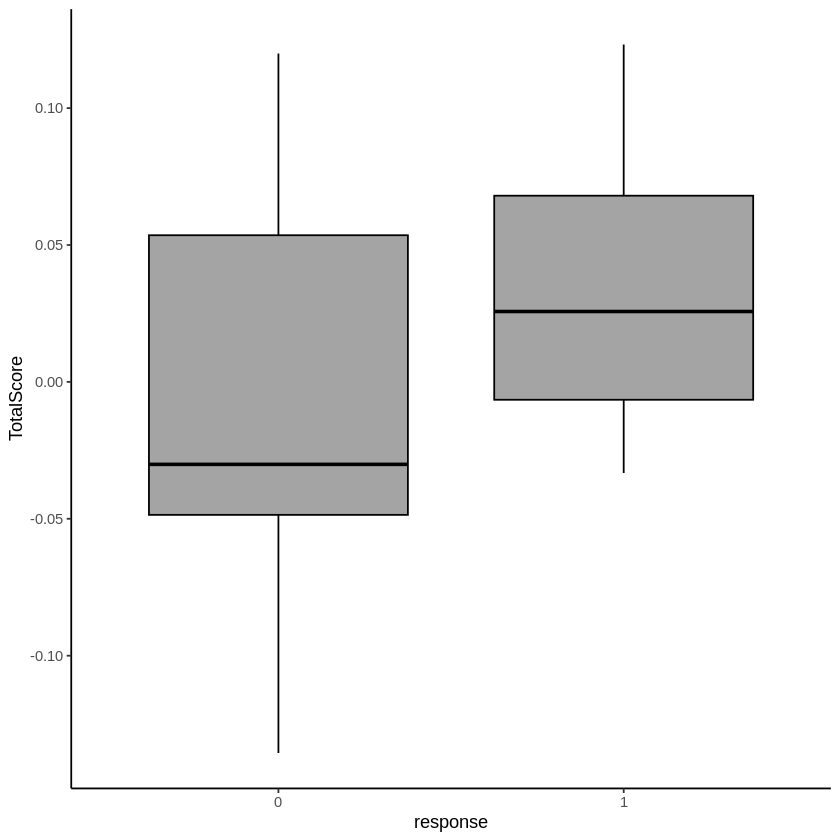

In [33]:
p<-ggplot(cluster0score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p

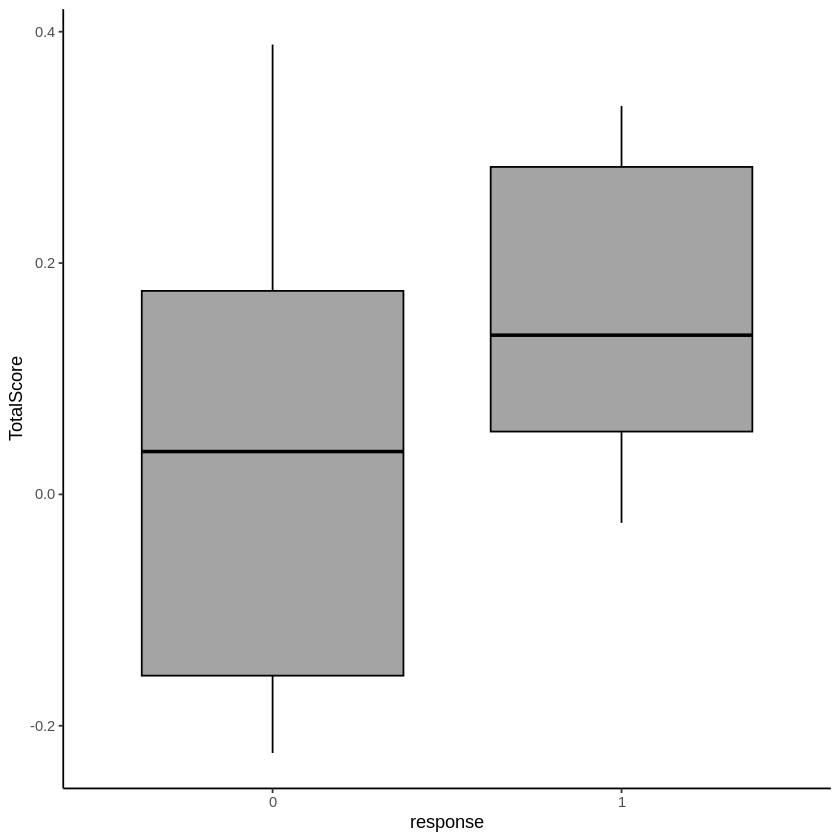

In [34]:
p<-ggplot(cluster1score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p

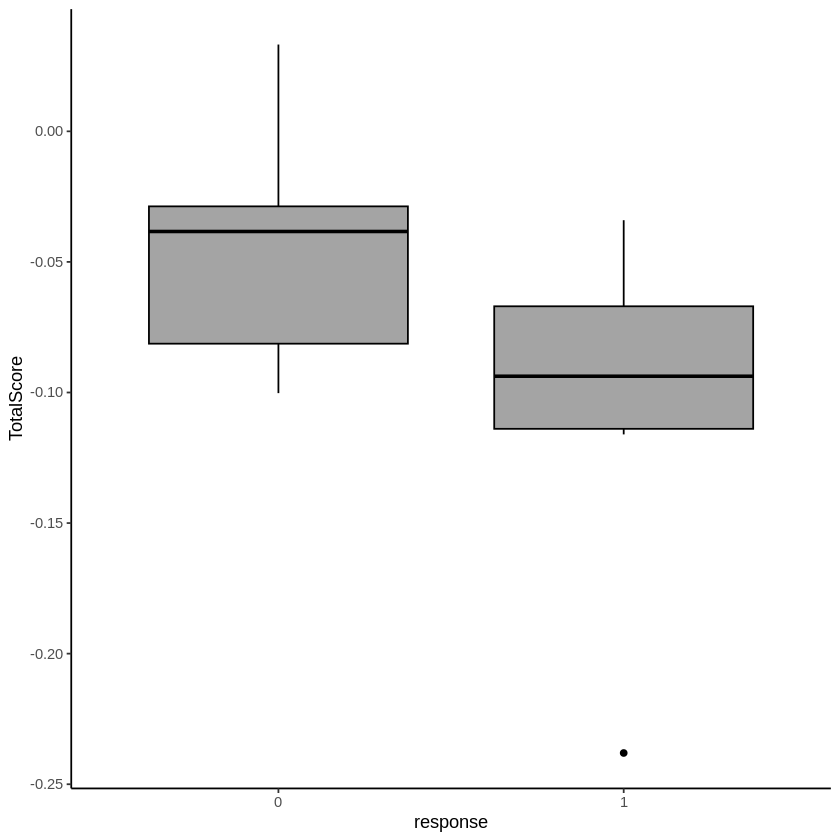

In [14]:
p<-ggplot(cluster2score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p